## Visualize waveforms generated for the AWG

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

"a_ch2" is a null channel.
"a_ch3" is a null channel.
"d_ch3" is a null channel.
"d_ch2" is a null channel.
"d_ch4" is a null channel.
"d_ch5" is a null channel.


<IPython.core.display.Javascript object>


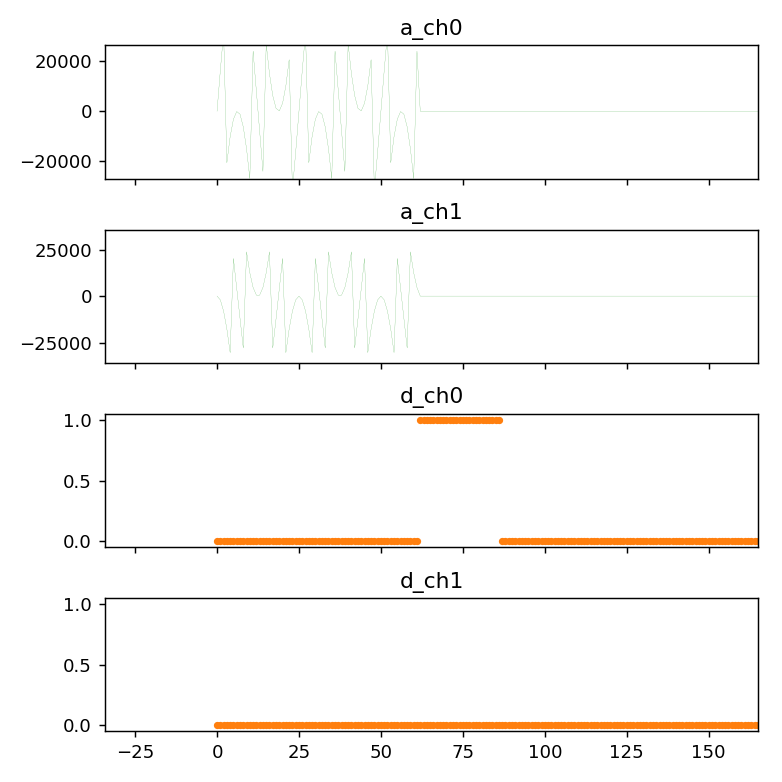

7375


In [8]:
%matplotlib notebook

# Enter name of pkl file without channel names
waveform_name = 'pODMRIQ'

loc = 'C:\\saved_pulsed_assets\\waveform\\'
keys = ['a_ch0', 'a_ch1', 'a_ch2', 'a_ch3', 'd_ch3','d_ch0', 'd_ch1', 'd_ch2', 'd_ch3', 'd_ch4', 'd_ch5']
channels = dict.fromkeys(keys, None)

for key in list(channels):
    try:
        with open(loc + waveform_name + '_' + key + '.pkl', 'rb') as f:
            channels[key] = pickle.load(f)
        if not np.any(channels[key]): # Delete channels with only zero
            print(f'"{key}" is a null channel.')
            del channels[key]  
    except FileNotFoundError as excep: # Delete channels that don't exist on disk
        print(excep) 
        del channels[key]

fig, ax = plt.subplots(nrows=len(channels), sharex=True, figsize=(len(channels)*1.5, len(channels)*1.5))
for idx, key in enumerate(channels):
    if key.startswith('a_'):
        ax[idx].plot(channels[key], label=key, linewidth=0.1, color="C2")
    else:
        ax[idx].plot(channels[key],".", label=key,linewidth=0.3, color="C1")
    ax[idx].set_title(f'{key}')

fig.tight_layout()

print(len(channels['a_ch0']))